In [206]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

library(tidyverse)
library(rstatix)

ERROR: Error in library(rstatix): there is no package called ‘rstatix’


In [220]:
set.seed(123)
data<- read.csv("data/Book1.csv")
data <- data %>% select(egg_name:st)|>
  mutate(test = as.factor(test))
data<-data|>mutate(HR=HR*6)
data
data48<-data|>filter(hours=='48')|>mutate(hours=as.factor(hours))
data72<-data|>filter(hours=='72')|>mutate(hours=as.factor(hours))
data48b<-data48|>filter(light=='b')
data48d<-data48|>filter(light=='d')
data72b<-data72|>filter(light=='b')
data72d<-data72|>filter(light=='d')

egg_name,test,hours,light,Temperature,stage,survive,HR,st
<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>
a1,2,48,b,28.4,14,yes,120,52
a2,2,48,b,22.5,15,yes,96,56
k1,2,48,d,27.5,12,yes,114,47
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
e1,1,168,d,NA,NA,no,NA,NA
e2,1,168,b,28.6,26,no,NA,108
e3,1,168,d,28.9,31,yes,NA,168


# 1. HR

## 48

Warning message:
“Removed 6 rows containing non-finite values (`stat_count()`).”


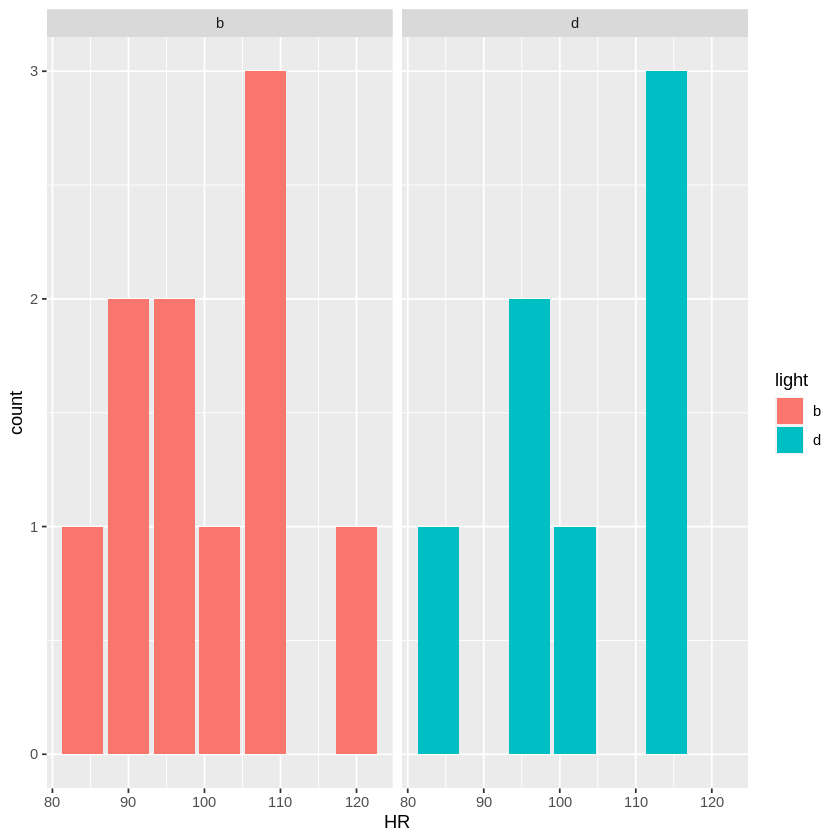

In [221]:
ggplot(data48, aes(x = HR, fill = light)) +
  geom_bar() +
  facet_grid(. ~ light)

In [222]:
t.test(x=data48b$HR, y=data48d$HR, var.equal = FALSE)


	Welch Two Sample t-test

data:  data48b$HR and data48d$HR
t = -0.47245, df = 12.495, p-value = 0.6448
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14.857674   9.543389
sample estimates:
mean of x mean of y 
 100.2000  102.8571 


## 72h*

Warning message:
“Removed 7 rows containing non-finite values (`stat_count()`).”


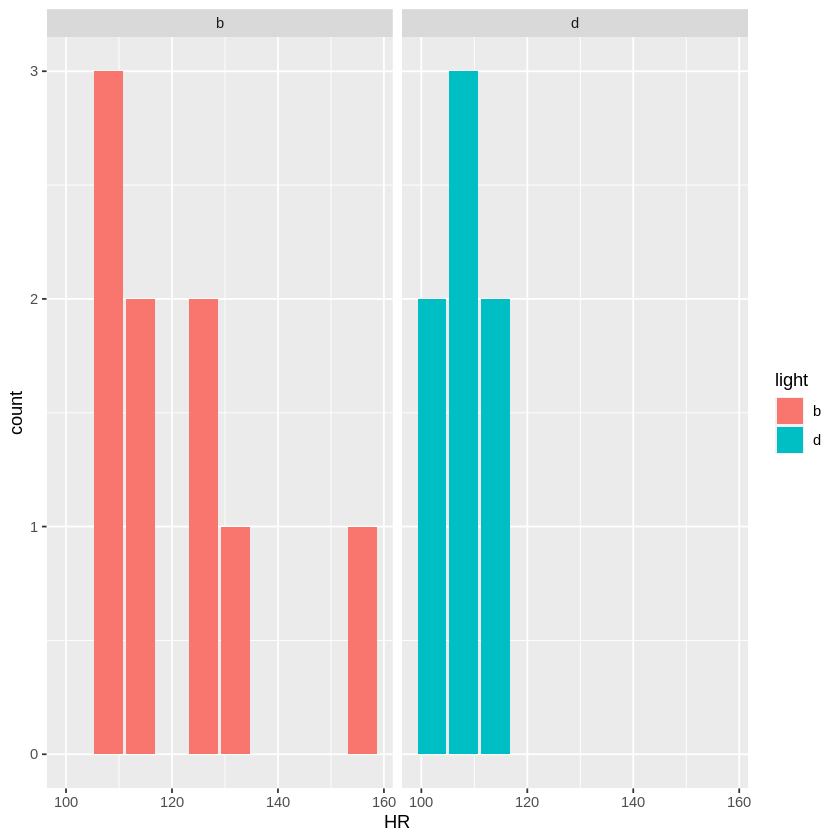

In [223]:

ggplot(data72, aes(x = HR, fill = light)) +
  geom_bar() +
  facet_grid(. ~ light)

Warning message:
“`geom_vline()`: Ignoring `data` because `xintercept` was provided.”
Warning message:
“`geom_vline()`: Ignoring `data` because `xintercept` was provided.”
Warning message:
“Removed 7 rows containing non-finite values (`stat_count()`).”


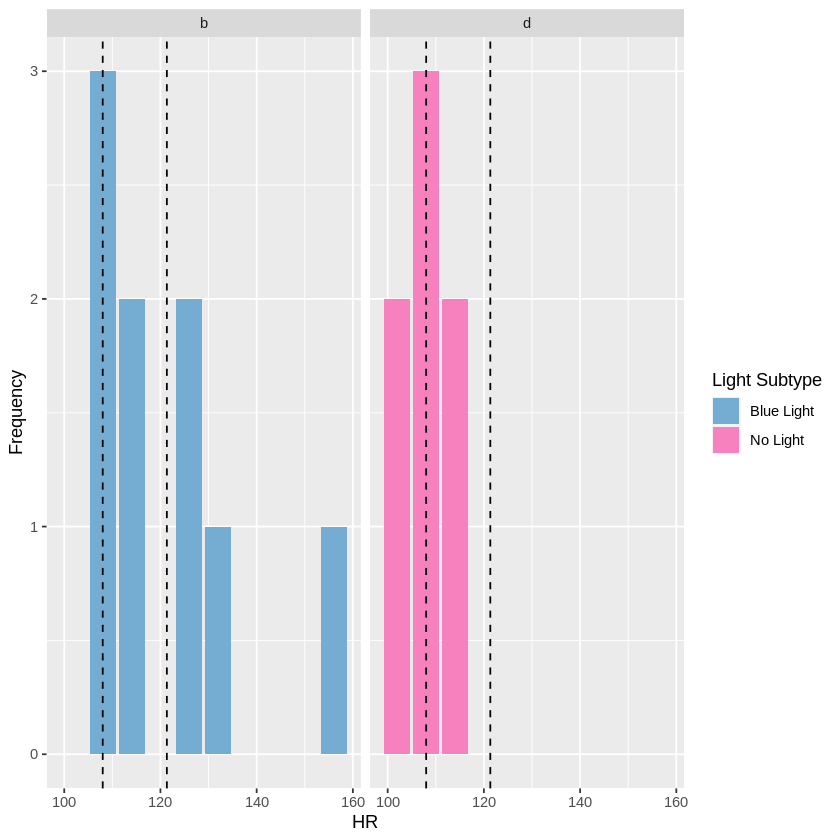

In [228]:
ggplot(data72, aes(x = HR, fill = light)) +
  geom_bar() +
  facet_grid(. ~ light) +
  labs(x = "HR", y = "Frequency", fill = "Incubation Light") +
  scale_fill_manual(values = c("#74ADD1", "#F781BF"), 
                    labels = c("Blue Light", "No Light"),
                    name = "Light Subtype") +
geom_vline(xintercept = 108, linetype = "dashed", color = "black", 
             show.legend = FALSE, 
             data = data.frame(light = "Blue Light")) +
  geom_vline(xintercept = 121.3333, linetype = "dashed", color = "black", 
             show.legend = FALSE, 
             data = data.frame(light = "No Light"))

In [225]:
t.test(x=data72b$HR, y=data72d$HR, var.equal = FALSE)
data72b$HR


	Welch Two Sample t-test

data:  data72b$HR and data72d$HR
t = 2.3868, df = 9.8957, p-value = 0.03841
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  0.8685593 25.7981074
sample estimates:
mean of x mean of y 
 121.3333  108.0000 


[1] 108 126 108 114  NA  NA 132 114  NA 126 108 156

# 2. Temp

## 48h

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


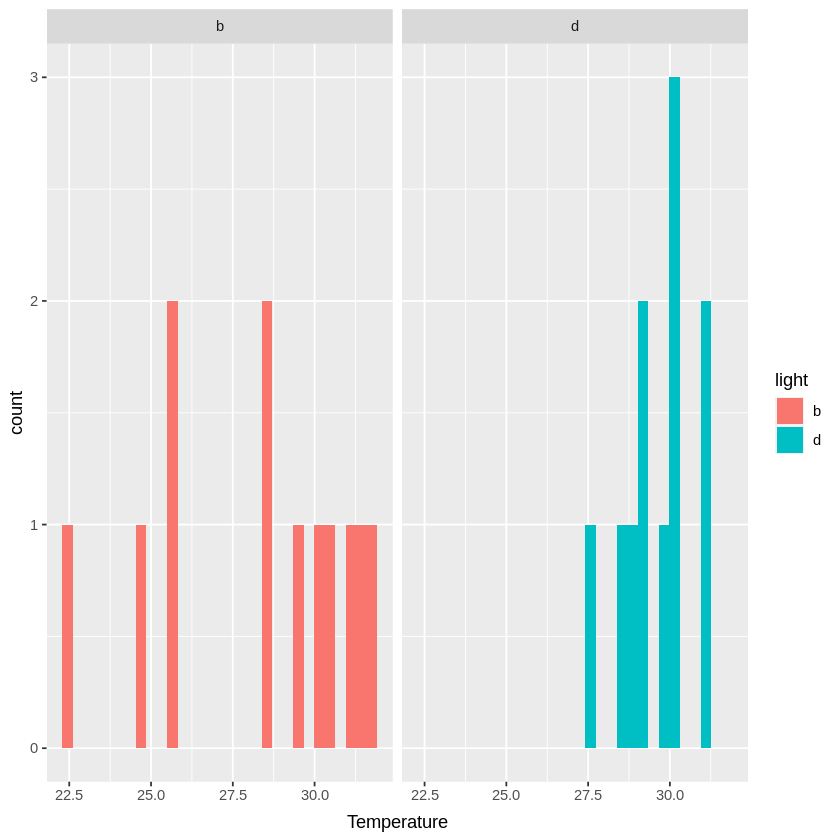

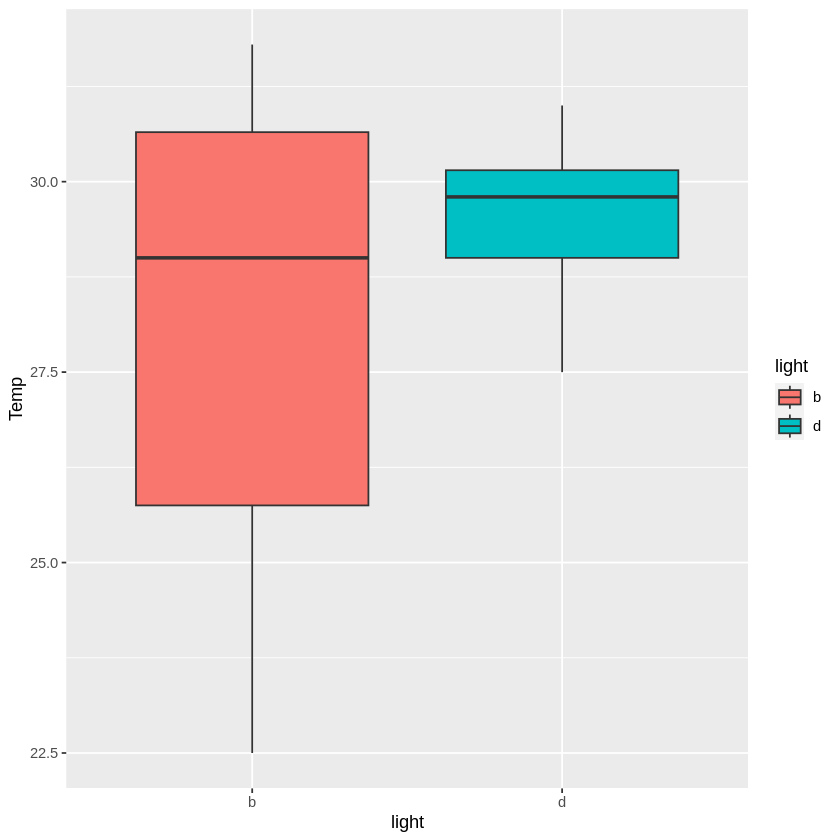

In [213]:
ggplot(data48, aes(x = Temperature, fill = light)) +
  geom_histogram() +
  facet_grid(. ~ light)

ggplot(data48, aes(x=light,y=Temperature, fill = light)) +
  geom_boxplot() +
  labs(x = 'light',y = "Temp", fill = "light")

In [165]:
t.test(x=data48b$Temperature, y=data48d$Temperature, var.equal = FALSE)


	Welch Two Sample t-test

data:  data48b$Temperature and data48d$Temperature
t = -1.3653, df = 13.866, p-value = 0.1939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.2349789  0.7198274
sample estimates:
mean of x mean of y 
 28.33333  29.59091 


## 72h*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 7 rows containing non-finite values (`stat_boxplot()`).”


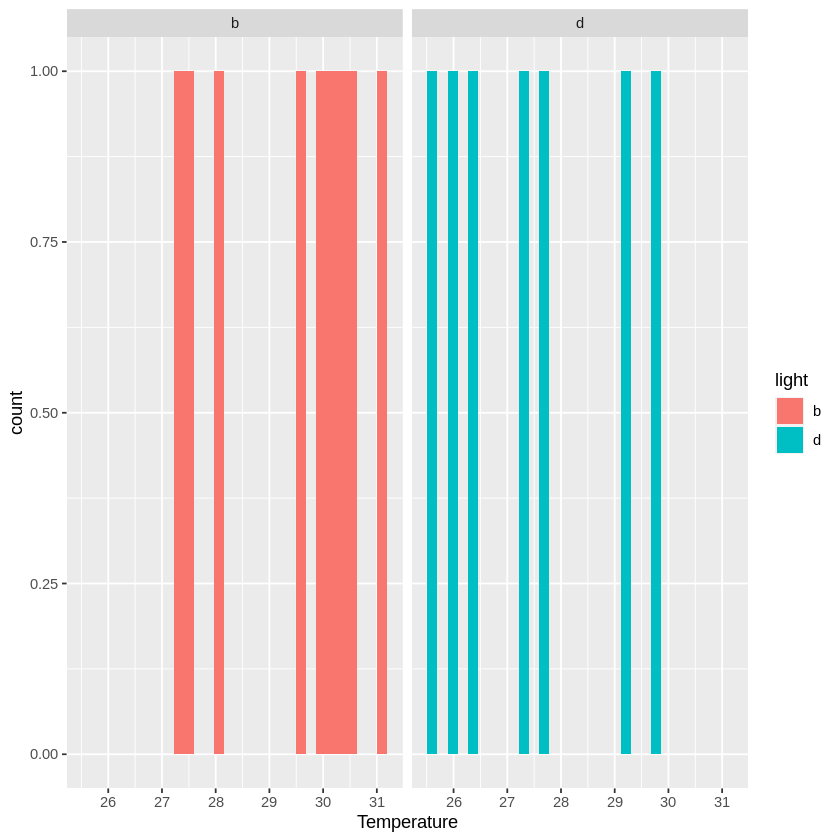

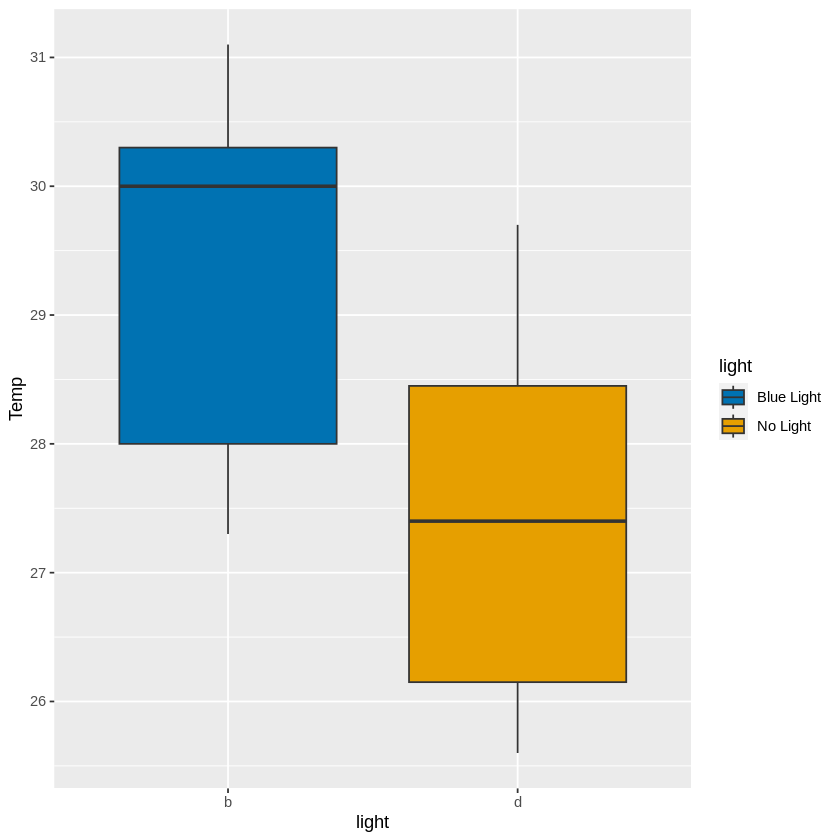

In [189]:
ggplot(data72, aes(x = Temperature, fill = light)) +
  geom_histogram() +
  facet_grid(. ~ light)

ggplot(data72, aes(x=light,y=Temperature, fill = light)) +
  geom_boxplot() +
  labs(x = 'light',y = "Temp", fill = "light")+
 scale_fill_manual(values = c("#0072B2", "#E69F00"), labels = c("Blue Light", "No Light"))

In [167]:
t.test(x=data72b$Temperature, y=data72d$Temperature, var.equal = FALSE)


	Welch Two Sample t-test

data:  data72b$Temperature and data72d$Temperature
t = 2.5505, df = 12.062, p-value = 0.02535
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2855003 3.6192616
sample estimates:
mean of x mean of y 
 29.36667  27.41429 


# 3. Development stage hours

## 48h*

Warning message:
“Removed 6 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_ydensity()`).”


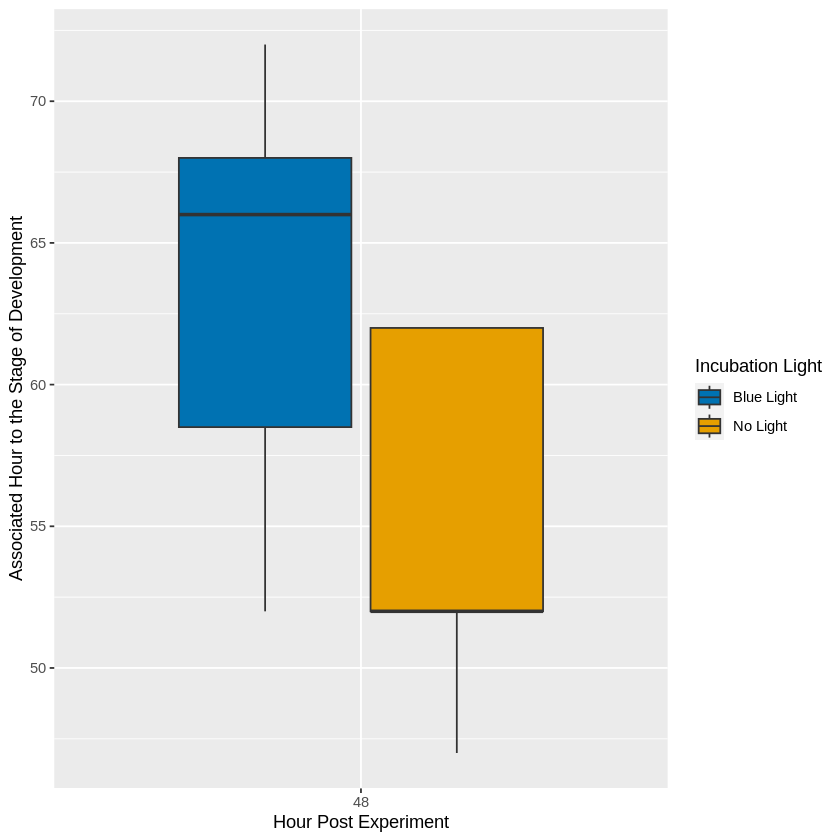

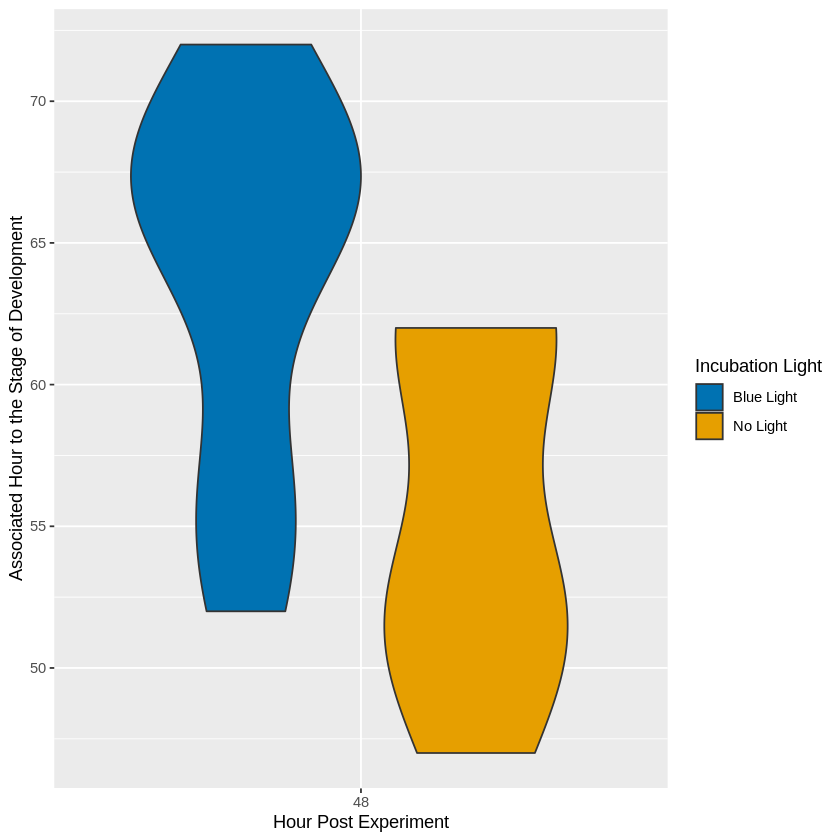

In [186]:
ggplot(data48, aes(x=hours,y=st, fill = light)) +
  geom_boxplot() +
  labs(x = "Hour Post Experiment", y = "Associated Hour to the Stage of Development", fill = "Incubation Light")+
 scale_fill_manual(values = c("#0072B2", "#E69F00"), labels = c("Blue Light", "No Light"))

ggplot(data48, aes(x=hours,y=st, fill = light)) +
  geom_violin() +
  labs(x = "Hour Post Experiment", y = "Associated Hour to the Stage of Development", fill = "Incubation Light")+
 scale_fill_manual(values = c("#0072B2", "#E69F00"), labels = c("Blue Light", "No Light"))

In [114]:
t.test(data48b$st,data48d$st, var.equal = FALSE)


	Welch Two Sample t-test

data:  data48b$st and data48d$st
t = 2.6011, df = 13.541, p-value = 0.02138
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  1.421892 15.035251
sample estimates:
mean of x mean of y 
 63.80000  55.57143 


## 72h

# 4. survive

## 48h

## 72h

## 7d*

In [53]:
table <- matrix(c(11, 1, 7, 4), nrow = 2, byrow = TRUE)
rownames(table) <- c("blue", "dark")
colnames(table) <- c("dead", "alive")

count_table <- table /0.23

table
count_table


chi_squared <- chisq.test(count_table)

print(chi_squared)

,dead,alive
blue,11,1
dark,7,4


,dead,alive
blue,47.82609,4.347826
dark,30.43478,17.391304



	Pearson's Chi-squared test with Yates' continuity correction

data:  count_table
X-squared = 9.9349, df = 1, p-value = 0.001622



,V1,V2
,<dbl>,<dbl>
blue,0.9166667,0.08333333
dark,0.6363636,0.36363636


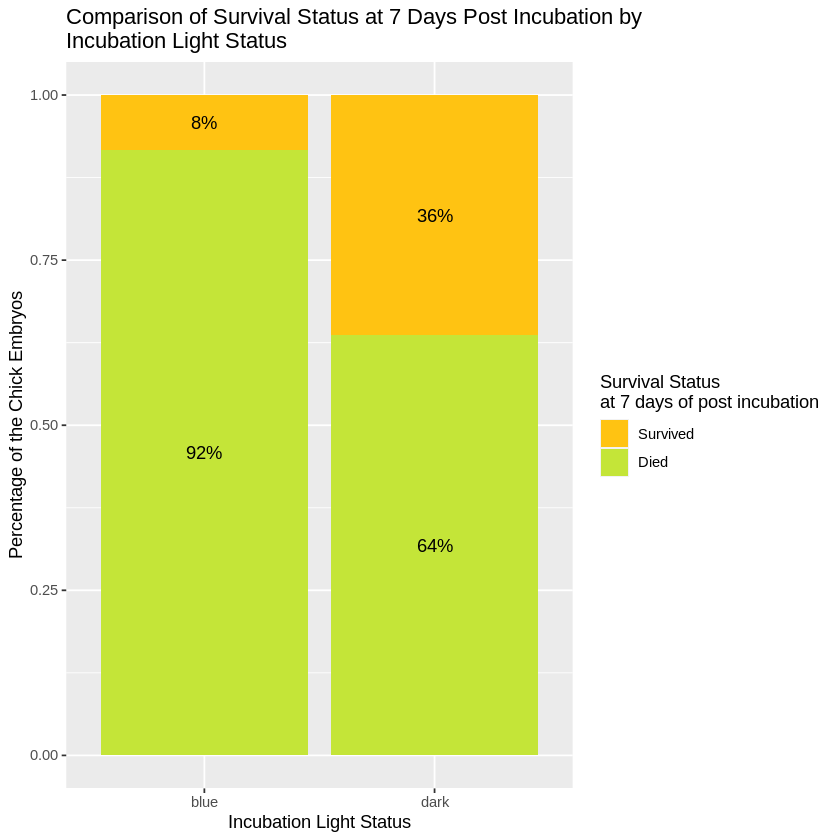

In [188]:
table <- matrix(c(11/12, 1/12, 7/11, 4/11), nrow = 2, byrow = TRUE)
df <- as.data.frame(table, row.names = c("blue", "dark"), col.names = c("dead", "alive"))
df

df3<-data.frame(
    'light'=c('blue','blue','dark','dark'),
    'survive'=c('dead','alive','dead','alive'),
    'frq'=c(11/12, 1/12, 7/11, 4/11)
    )


ggplot(df3, aes(x=light, y=frq, fill=survive)) +
  geom_bar(stat="identity") +
  geom_text(aes(label = paste0(round(frq*100), "%")), position = position_stack(vjust = 0.5)) +
  scale_fill_manual(values = c("#FFC312", "#C4E538"), labels = c("Survived", "Died"),
                    name = "Survival Status\nat 7 days of post incubation") +
  labs(x = 'Incubation Light Status', y = 'Percentage of the Chick Embryos') +
  ggtitle("Comparison of Survival Status at 7 Days Post Incubation by\nIncubation Light Status")



#ggplot(df3, aes(x=light, y=frq, fill=survive))+
#geom_bar(stat="identity"  )+

#scale_fill_brewer(palette="Paired")+
#labs(x='Incubation Light Status',y='Percantage of the Chick Embryos',
 #    fill='Survival Status at\n7 days of post incubation')